In [1]:
%matplotlib inline

import cv2
import numpy as np
import face_recognition
from matplotlib import pyplot as plt

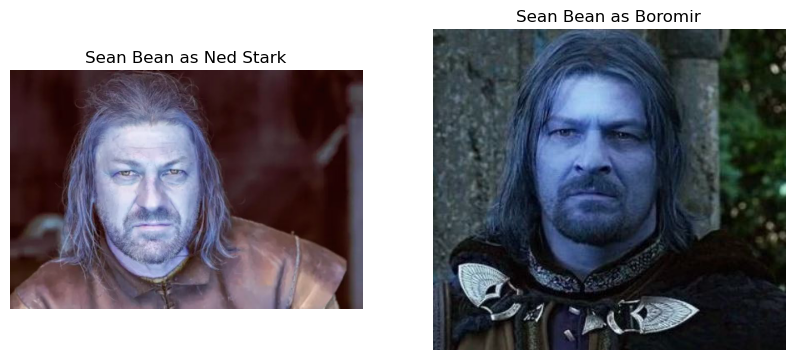

In [2]:
imgBean = face_recognition.load_image_file('data/Ned Stark.JPG')
imgBean = cv2.cvtColor(imgBean, cv2.COLOR_BGR2RGB)

imgTest = face_recognition.load_image_file('data/Boromir.JPG')
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

# to show directly
#cv2.imshow('Sean Bean as Ned Stark', imgBean)
#cv2.imshow('Sean Bean as Boromir', imgTest)
#cv2.waitKey(0)

# to show in jupyter notebook
cols = 1
rows = 2

fig = plt.figure(figsize=(10,7))
fig.add_subplot(cols, rows, 1)
plt.imshow(imgBean)
plt.axis('off')
plt.title('Sean Bean as Ned Stark')

fig.add_subplot(cols, rows, 2)
plt.imshow(imgTest)
plt.axis('off')
plt.title('Sean Bean as Boromir')

plt.show()

In [3]:
faceLoc = face_recognition.face_locations(imgBean)[0]
encodeBean = face_recognition.face_encodings(imgBean)[0]
print(faceLoc)

(142, 390, 365, 167)


The 4 value above suggest that the bounding box is:

(Top left, Top Right, Bottom Right, Bottom Left)

Text(0.5, 1.0, 'Sean Bean as Ned Stark with bounding box')

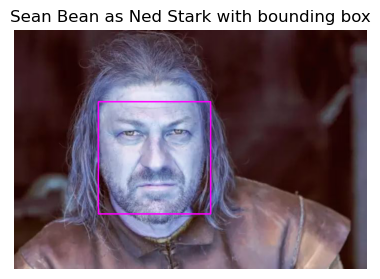

In [4]:
cv2.rectangle(imgBean, (faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]), (255,0,255), 2)

fig = plt.figure(figsize=(10,7))
fig.add_subplot(cols, rows, 1)
plt.imshow(imgBean)
plt.axis('off')
plt.title('Sean Bean as Ned Stark with bounding box')

# to show as pop out without drawing the figures again
#cv2.imshow('Sean Bean as Ned Stark', imgBean)
#cv2.imshow('Sean Bean as Boromir', imgTest)
#cv2.waitKey(0)

(81, 270, 236, 115)


Text(0.5, 1.0, 'Sean Bean as Boromir with bounding box')

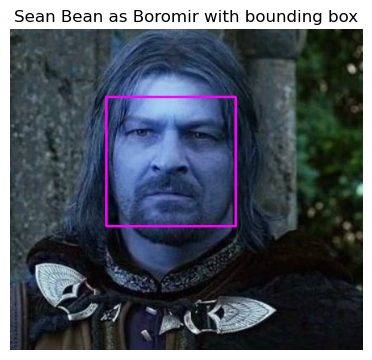

In [5]:
# doing the same for the test boromir image

# technically we don't need the bounding box for the test image, we just need the encodings
faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest, (faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]), (255,0,255), 2)
print(faceLocTest)

fig = plt.figure(figsize=(10,7))
fig.add_subplot(cols, rows, 1)
plt.imshow(imgTest)
plt.axis('off')
plt.title('Sean Bean as Boromir with bounding box')

In [7]:
# getting the distance between the encodings of the img + test img


results =  face_recognition.compare_faces([encodeBean], encodeTest)
print(results)

[True]


The value [True] suggest the value is found to be correct, and Sean Bean is detected correctly

Let's try an image that isn't Sean Bean, This time we use Russell Allen, whom the internet apparently says look like Sean Bean

In [8]:
imgAllen = face_recognition.load_image_file('data/RA.JPG')
imgAllen = cv2.cvtColor(imgAllen, cv2.COLOR_BGR2RGB)
encodeAllen = face_recognition.face_encodings(imgAllen)[0]

results =  face_recognition.compare_faces([encodeBean], encodeAllen)
print(results)

[True]


I think they really look alike.

Let's try with Russell Brand

In [9]:
imgBrand = face_recognition.load_image_file('data/RB.JPG')
imgBrand = cv2.cvtColor(imgBrand, cv2.COLOR_BGR2RGB)
encodeBrand = face_recognition.face_encodings(imgBrand)[0]

results =  face_recognition.compare_faces([encodeBean], encodeBrand)
print(results)

[False]


Ah finally...

Let's find out how similar these images are, by finding out the distance apart

In [10]:
faceDis = face_recognition.face_distance([encodeBean], encodeTest)
results =  face_recognition.compare_faces([encodeBean], encodeTest)
print(results, faceDis)

[True] [0.52268985]


In [11]:
faceDisAllen = face_recognition.face_distance([encodeBean], encodeAllen)
resultsAllen =  face_recognition.compare_faces([encodeBean], encodeAllen)
print(resultsAllen, faceDisAllen)

[True] [0.57494452]


In [12]:
faceDisBrand = face_recognition.face_distance([encodeBean], encodeBrand)
resultsBrand =  face_recognition.compare_faces([encodeBean], encodeBrand)
print(resultsBrand, faceDisBrand)

[False] [0.93256034]
